In [2]:
import array
import pickle

def getTextFromCooc(pathToFile):
    with open(pathToFile, 'r', encoding='utf8') as f:
        indexRow = 0
        headerText = []
        docs = []
        for row in f:
            if(indexRow == 0):
                for word in row.split(','):
                    headerText.append(word)
            else:
                indexNumber = 0
                isStringCreated = False
                for word2 in row.split(','):
                    if(indexNumber == 0):
                        pass
                    else:
                        if int(word2) == 1:
                            if(isStringCreated == False):
                                string = ''
                                isStringCreated = True
                            if(string == ""):
                                string = headerText[indexNumber-1]
                            else:
                                string = string +' '+headerText[indexNumber-1]
                    indexNumber += 1
                #string = string[2:]
                docs.append(string)
                docs = [s.replace("'", '"') for s in docs] # remove all the 8s 
            indexRow +=1
    with open('./docs/textTheGoodScents.txt','wb') as f:
        pickle.dump(docs, f)
    return [docs,headerText]

docs,headerText = getTextFromCooc('./TGS/dataTGS.csv')
indice = 0
for doc in docs:
    docSplitted = doc.split(' ')
    docs[indice] = docSplitted
    indice += 1

meanWindow = 0;
for doc in docs:
    meanWindow += len(doc)
meanWindow = meanWindow / len(docs) 
print(meanWindow)

4.563087688607041


In [4]:
import gensim, logging
logging.info("Start to generate model for skip gram size 300")

logging.info("Generating skip-gram 300...")
mymodel = gensim.models.Word2Vec(docs,size=30,min_count=1,batch_words=60,window = 7)
mymodel.save("./model/word2vec300SG")

In [14]:
embedded_mat = []
for word in mymodel.wv.vocab:
    embedded_mat.append(mymodel.wv[word])

In [15]:
import numpy as np
embedded_mat = np.array(embedded_mat)
embedded_mat.shape

(381, 30)

In [16]:
for word in mymodel.wv.vocab:
    if word == 'tilleul':
        print(mymodel.wv[word])

print(mymodel.wv['tequila'])
meanDist = 0
for word in mymodel.wv.vocab:
    meanDist += mymodel.wv.distance(word,'fruité')
print(meanDist/381)

for word in mymodel.wv.vocab:
    meanDist += mymodel.wv.distance(word,'tilleul')
print(meanDist/381)

[-0.00522176 -0.02830269 -0.0218707   0.01727783  0.00817312 -0.04195762
 -0.01025915  0.00321362 -0.00174023 -0.02154218 -0.04493264 -0.00027258
  0.03256034  0.00932679  0.00118942  0.0179462   0.01820271 -0.01514862
  0.00211261 -0.00208831  0.00474694 -0.02632702  0.08357132 -0.03153123
 -0.03685824  0.01354903  0.02989166  0.00610571  0.02223483  0.01657008]
[-0.00619179 -0.00478715  0.00785907 -0.01380612 -0.00784125 -0.00556318
 -0.00427749  0.01350032 -0.00383601 -0.00031934 -0.00941265  0.01213634
 -0.00393352  0.01050805  0.01137749 -0.00477699  0.01546384 -0.01969212
  0.00531851 -0.00812399 -0.00509951 -0.0075074   0.02484378 -0.01812815
 -0.02931158  0.01665542  0.01255276  0.01722285  0.01272602  0.01234635]
0.027024342671154052
0.12670868535445431


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 381 samples in 0.000s...
[t-SNE] Computed neighbors for 381 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 381 / 381
[t-SNE] Mean sigma: 0.010936
[t-SNE] Computed conditional probabilities in 0.006s
[t-SNE] Iteration 50: error = 66.9370956, gradient norm = 0.0000001 (50 iterations in 0.104s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: 66.937096
[t-SNE] Iteration 100: error = 2.4936252, gradient norm = 0.0105249 (50 iterations in 0.097s)
[t-SNE] Iteration 150: error = 2.1298583, gradient norm = 0.0031902 (50 iterations in 0.069s)
[t-SNE] Iteration 200: error = 2.0341773, gradient norm = 0.0013408 (50 iterations in 0.068s)
[t-SNE] Iteration 250: error = 1.9897048, gradient norm = 0.0007334 (50 iterations in 0.070s)
[t-SNE] Iteration 300: error = 1.9682474, gradient norm = 0.0005519 (50 iterations in 0.070s)
[t-SNE] Iteration 

D:\IDE\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 65279 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\IDE\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 65279 missing from current font.
  font.set_text(s, 0, flags=flags)


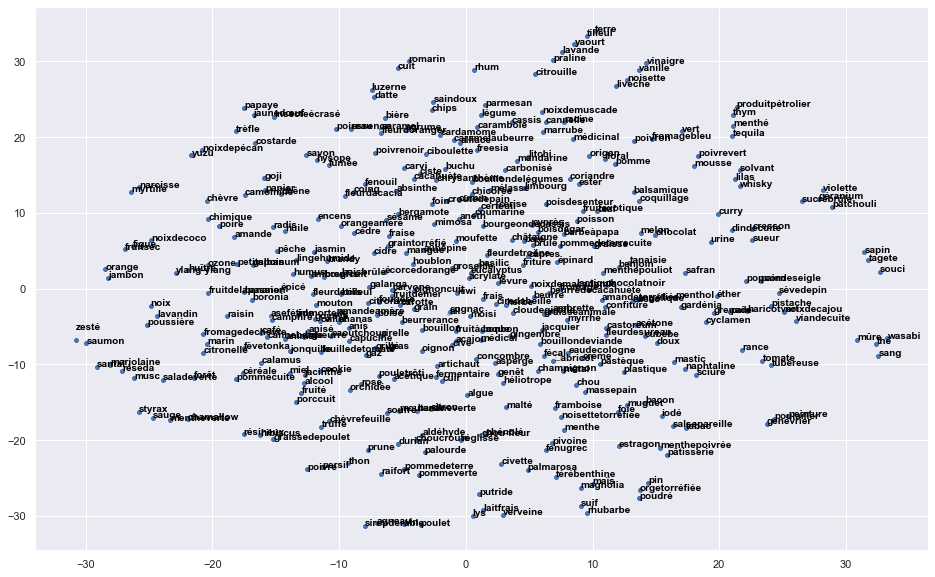

In [17]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
def getCosineMatrix(emb):
    matrix = pairwise_distances(emb, metric='cosine', n_jobs=-1)
    return np.abs(matrix)

cosine_matrix = getCosineMatrix(embedded_mat)


tsne = TSNE(n_components=2,metric='precomputed',verbose=2,n_iter=2000,perplexity=10,early_exaggeration = 12,learning_rate=10)
X_embedded = tsne.fit_transform(cosine_matrix)

df_subset = {} 
df_subset['tsne-2d-one'] = X_embedded[:,0]
df_subset['tsne-2d-two'] = X_embedded[:,1]
plt.figure(figsize=(16,10))
p1 = sns.scatterplot(X_embedded[:,0], X_embedded[:,1], legend='full', palette=palette)
for line in range(0,embedded_mat.shape[0]):
     p1.text(df_subset['tsne-2d-one'][line]+0.01, df_subset['tsne-2d-two'][line], 
     headerText[line], horizontalalignment='left', 
     size='small', color='black', weight='semibold')


In [12]:
from datetime import datetime
index = 0 
test_size = [10,20,30,40,50,60]
batch_size_test = [500,1250,2500]
for size in test_size:
    for batch_size_t in batch_size_test:
        start_time = datetime.now()
        print("Starting "+ str(index) +" GloVe model with emb_size = " + str(size) + " batch size : " + str(batch_size_t))
        mymodel = gensim.models.Word2Vec(docs,size=size,min_count=1,batch_words=batch_size_t,window = 7)
        mymodel.save("./model/word2vec300SG")
        from sklearn.metrics.pairwise import cosine_distances
        embedded_mat = []
        for word in mymodel.wv.vocab:
            embedded_mat.append(mymodel.wv[word])
        import numpy as np
        embed_mat = np.array(embedded_mat)
        embed_mat.shape
        cosine_matrix = cosine_distances(embed_mat)
        print(cosine_matrix.shape)
        mb1 = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
        mb2 = [0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]
        mb3 = [0,0.1,0.2,0.3,0.4,0.5,0.6]
        kppv_distance = np.empty([1520],dtype=float)
        index=0
        for row in cosine_matrix:
            t = np.array(row)
            indices = t.argsort()
            print(t[indices])
            indices = indices[t[indices] > 0]
            kppv_distance[index] = t[indices[0]]
            index+=1
            kppv_distance[index] = t[indices[1]]
            index+=1
            kppv_distance[index] = t[indices[2]]
            index+=1
            kppv_distance[index] = t[indices[3]]
            index+=1

        plt.hist(kppv_distance,edgecolor = 'red',bins=mb1)
        plt.xlabel('valeurs')
        plt.ylabel('nombres')
        plt.xticks(mb1)
        plt.title('Histogramme distance cosinus TGS 4ppv')
        plt.show()


        test = np.where(np.logical_and(kppv_distance>=0, kppv_distance<=0.1))
        arr = [len(test)]
        ind = 0
        for index in test:
            arr[ind] = kppv_distance[index]

        plt.hist(arr,edgecolor = 'red',bins=mb2)
        plt.xlabel('valeurs')
        plt.ylabel('nombres')
        plt.xticks(mb2)
        plt.title('Histogramme distance cosinus TGS 4ppv')
        plt.show()
        
        test2 = np.where(np.logical_and(kppv_distance>=0, kppv_distance<=0.55))
        arr = [len(test2)]
        ind = 0
        for index in test2:
            arr[ind] = kppv_distance[index]

        plt.hist(arr,edgecolor = 'red',bins=mb3)
        plt.xlabel('valeurs')
        plt.ylabel('nombres')
        plt.xticks(mb3)
        plt.title('Histogramme distance cosinus TGS 4ppv')
        plt.show()
        end_time = datetime.now()
        print('Duration: {}'.format(end_time - start_time))

Starting 0 GloVe model with emb_size = 10 batch size : 500
(381, 381)
[0.00000000e+00 9.23335552e-04 1.10846758e-03 1.16240978e-03
 1.16354227e-03 1.18017197e-03 1.30742788e-03 1.36369467e-03
 1.39009953e-03 1.39129162e-03 1.39820576e-03 1.43200159e-03
 1.50042772e-03 1.52069330e-03 1.52748823e-03 1.58470869e-03
 1.58548355e-03 1.58911943e-03 1.62601471e-03 1.63918734e-03
 1.66940689e-03 1.68490410e-03 1.68550014e-03 1.71583891e-03
 1.75786018e-03 1.76542997e-03 1.88040733e-03 1.89197063e-03
 1.91390514e-03 1.92368031e-03 1.92499161e-03 1.93619728e-03
 1.94454193e-03 2.01630592e-03 2.04682350e-03 2.08175182e-03
 2.08973885e-03 2.11280584e-03 2.12013721e-03 2.12782621e-03
 2.14993954e-03 2.15584040e-03 2.17038393e-03 2.22629309e-03
 2.23243237e-03 2.26402283e-03 2.29102373e-03 2.32732296e-03
 2.33322382e-03 2.33644247e-03 2.34043598e-03 2.35724449e-03
 2.38227844e-03 2.39145756e-03 2.39372253e-03 2.43830681e-03
 2.45136023e-03 2.45964527e-03 2.50256062e-03 2.51781940e-03
 2.51805782e-03

[0.00000000e+00 8.41915607e-04 1.14315748e-03 1.42824650e-03
 1.44392252e-03 1.59651041e-03 1.62106752e-03 1.63424015e-03
 1.64198875e-03 1.80155039e-03 1.83278322e-03 1.85436010e-03
 1.86991692e-03 1.91003084e-03 1.96284056e-03 1.96909904e-03
 1.97738409e-03 2.03156471e-03 2.11220980e-03 2.22790241e-03
 2.24041939e-03 2.26712227e-03 2.26825476e-03 2.27320194e-03
 2.32124329e-03 2.38317251e-03 2.38656998e-03 2.40796804e-03
 2.42406130e-03 2.42877007e-03 2.43926048e-03 2.44075060e-03
 2.46119499e-03 2.46256590e-03 2.46894360e-03 2.49809027e-03
 2.54851580e-03 2.61044502e-03 2.63237953e-03 2.63899565e-03
 2.64543295e-03 2.67660618e-03 2.68363953e-03 2.69067287e-03
 2.71278620e-03 2.71743536e-03 2.72011757e-03 2.72607803e-03
 2.73638964e-03 2.77006626e-03 2.78449059e-03 2.88969278e-03
 2.89893150e-03 2.90334225e-03 2.90369987e-03 2.92426348e-03
 2.95084715e-03 2.95579433e-03 2.98225880e-03 2.99638510e-03
 3.03125381e-03 3.03202868e-03 3.04365158e-03 3.04603577e-03
 3.06075811e-03 3.079295

 1.24909925e+00]
[0.00000000e+00 9.33647156e-04 9.49919224e-04 9.78589058e-04
 1.08081102e-03 1.08498335e-03 1.15668774e-03 1.30295753e-03
 1.30695105e-03 1.31237507e-03 1.31553411e-03 1.36089325e-03
 1.37561560e-03 1.46472454e-03 1.49321556e-03 1.52343512e-03
 1.53523684e-03 1.59889460e-03 1.62965059e-03 1.67000294e-03
 1.68251991e-03 1.69283152e-03 1.69521570e-03 1.74599886e-03
 1.76411867e-03 1.83117390e-03 1.84696913e-03 1.88684464e-03
 1.95717812e-03 1.98501348e-03 2.02143192e-03 2.06923485e-03
 2.08008289e-03 2.08234787e-03 2.08932161e-03 2.09498405e-03
 2.13485956e-03 2.20501423e-03 2.27314234e-03 2.35348940e-03
 2.35968828e-03 2.36719847e-03 2.37733126e-03 2.39831209e-03
 2.49135494e-03 2.49350071e-03 2.57295370e-03 2.60341167e-03
 2.61801481e-03 2.63702869e-03 2.64173746e-03 2.65949965e-03
 2.66784430e-03 2.71213055e-03 2.73823738e-03 2.76082754e-03
 2.77405977e-03 2.78270245e-03 2.80052423e-03 2.81357765e-03
 2.81548500e-03 2.89362669e-03 2.92706490e-03 2.92730331e-03
 3.0052

 1.25363195e+00]
[0.00000000e+00 8.36193562e-04 9.29176807e-04 1.06096268e-03
 1.47551298e-03 1.55138969e-03 1.64628029e-03 1.68222189e-03
 1.69801712e-03 1.87939405e-03 1.88058615e-03 1.90526247e-03
 1.94865465e-03 2.01004744e-03 2.01654434e-03 2.09456682e-03
 2.12085247e-03 2.14552879e-03 2.18003988e-03 2.18260288e-03
 2.20173597e-03 2.21103430e-03 2.21431255e-03 2.21574306e-03
 2.24602222e-03 2.30306387e-03 2.31909752e-03 2.31987238e-03
 2.36618519e-03 2.42149830e-03 2.44706869e-03 2.45887041e-03
 2.46500969e-03 2.47347355e-03 2.48503685e-03 2.49570608e-03
 2.54273415e-03 2.55310535e-03 2.59768963e-03 2.61384249e-03
 2.67207623e-03 2.72876024e-03 2.72893906e-03 2.77680159e-03
 2.80368328e-03 2.80803442e-03 2.80827284e-03 2.83086300e-03
 2.84117460e-03 2.87127495e-03 2.88009644e-03 2.89618969e-03
 2.90119648e-03 2.93451548e-03 2.94750929e-03 2.95245647e-03
 3.02481651e-03 3.17716599e-03 3.19796801e-03 3.24028730e-03
 3.24487686e-03 3.28236818e-03 3.28773260e-03 3.33625078e-03
 3.3530

 1.22287631e+00]
[0.         0.00226712 0.00286931 0.00332725 0.00341898 0.00350672
 0.00356632 0.003618   0.00362825 0.00371909 0.00391507 0.00392103
 0.00398588 0.004058   0.00413591 0.00413674 0.00420034 0.00441974
 0.00450248 0.0045898  0.00461632 0.00466108 0.00478077 0.00485951
 0.00496525 0.00502348 0.00516784 0.00518495 0.00523174 0.00527722
 0.00528103 0.00531614 0.00534856 0.0053615  0.00536174 0.00536686
 0.0053885  0.00541443 0.00542188 0.00543547 0.00547898 0.00548226
 0.00548619 0.00551707 0.00552976 0.00553405 0.00553769 0.00553912
 0.00565457 0.00565583 0.00567836 0.00574553 0.00577056 0.00581223
 0.00584859 0.00591916 0.0059374  0.00597602 0.00606644 0.00613165
 0.00627714 0.00628459 0.00628591 0.00629491 0.00630337 0.00632745
 0.00635922 0.00637794 0.00639695 0.00641066 0.00649327 0.00651425
 0.00653398 0.00654739 0.00657278 0.00657785 0.0065853  0.00659269
 0.00666994 0.00669199 0.00669938 0.00674039 0.00675672 0.00694817
 0.00699294 0.00702083 0.00705189 0.00705546 

 0.8688686  1.2103662  1.2123094 ]
[0.         0.00182015 0.00190109 0.00216794 0.00263703 0.00274688
 0.00302899 0.00328749 0.00338227 0.00340843 0.00344217 0.00351083
 0.00352722 0.00360191 0.00360608 0.00361991 0.00366449 0.00369126
 0.00374538 0.00383466 0.00388211 0.00388396 0.00394821 0.0039773
 0.00399709 0.00403756 0.00403911 0.00406134 0.00414181 0.00423414
 0.00423437 0.00431424 0.00440437 0.00442195 0.0044356  0.00449222
 0.00452852 0.00466835 0.00468278 0.0048278  0.00487739 0.00487757
 0.00490451 0.00495327 0.00495559 0.00496078 0.0050059  0.00503922
 0.00503945 0.00505394 0.0050723  0.00509894 0.00510317 0.005171
 0.00519401 0.00522286 0.00524217 0.00526094 0.00526482 0.00532836
 0.00539094 0.0053947  0.00540936 0.0054189  0.00541931 0.00542349
 0.00543272 0.00549436 0.00552112 0.00552821 0.00553113 0.0055427
 0.00554919 0.0055511  0.00559026 0.00561261 0.00563234 0.00567955
 0.00568134 0.00571752 0.00574851 0.00574851 0.00575131 0.00581473
 0.00582677 0.00584477 0.005873

IndexError: index 1520 is out of bounds for axis 0 with size 1520